---

# Lecture 9

- [**1. Curve fitting**](#1.-Curve-fitting)
    

- [**2. Interpolation of data**](#2.-Interpolation-of-data)    


- [**3. Jupyter notebook**](#3.-Jupyter-notebook)    

---

## 1. Curve fitting

- Curve fitting is the process of constructing a mathematical function that has the best fit to a series of data points


- Result of curve fitting is a mathematical function with well defined (fit) coeficients

### 1.1. Example

- First create some data.

In [1]:
import numpy
import matplotlib.pyplot as plt
import pylab

In [2]:
def create_data(n):
    """
    Given an integer n, returns n data points x
    and values y as a numpy.array.
    """
    
    xmax = 5.0
    x = numpy.linspace(0, xmax, n)
    y = -x**2
    
    # add noise to x-data
    numpy.random.seed(2)
    y += 1.5 * numpy.random.normal(size=len(x))
    
    return x, y

In [3]:
n = 10
x, y = create_data(n)

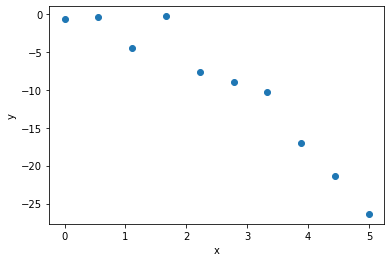

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='data point')
ax.set_xlabel('x')
ax.set_ylabel('y');

- define model function to be fitted to the data: 

  - eyeballing the data it appears that parabola could be a good choice for a model function:

  $$
  y = ax^2 + bx + c
  $$
  
  - which can be implemented as follows:

In [5]:
def model(x, a, b, c):
    """
    Equation to be fitted to the data. The purpose of curve
    fitting is to find the coefficients a, b, c.
    """
    return a * x ** 2 + b * x + c

- now fit the model to the data


- this will find optimal values of the model coefficients $a$, $b$, $c$ minimising the difference between the model function and the original data (in the least-squares sense)

In [6]:
import scipy.optimize

In [7]:
p, pcov = scipy.optimize.curve_fit(model, x, y)

In [8]:
a, b, c = p

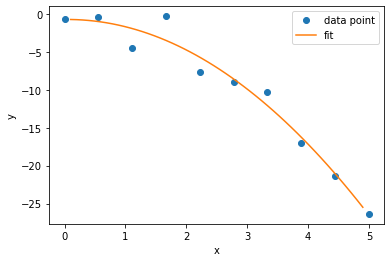

In [9]:
fig, ax = plt.subplots()

# plot the original data
ax.plot(x, y, 'o', label='data point')

# use finer and regular mesh for fitted plot
xfine = numpy.linspace(0.1, 4.9, n * 5)

ax.plot(xfine, model(xfine, a, b, c), label='fit')

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y');

- The values of the fit coefficients $a$, $b$, and $c$ are:

In [10]:
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")

a = -1.0495254065935558
b = 0.09302367819436153
c = -0.7439437306434895


And thus the model function optimimally fitting the data (in the least-squares sense) can be written as:

$$
y = -1.0495x^2 + 0.0930x - 0.7439
$$

where the coefficients have been rounded to 4 decimal places

#### Summary:

- Curve fitting allows to obtain algebraic functions optimally modelling the data


- This is different from interpolation, where interpolating functions are typically given numerically

---

## 2. Interpolation of data

- Given a set of $N$ points $(x_i, y_i)$ with $i=1,2,\ldots N$, we sometimes need a function $\bar f(x)$ which returns $y_i=f(x_i)$ and interpolates the data between the $x_i$


- this interpolation can be done using scipy's function `interp1d` as: 

  fbar = `scipy.interpolate.interp1d(xi, yi, kind='linear')`


- Note that the function `interp1d` returns a function `fbar` which will interpolate the `x-y` data for any given $x$ when called as `fbar(x)`

### 2.1. Example

- Consider the data as given in the previous example where we used interpolation to interpolate between the points

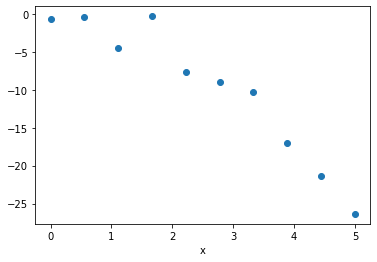

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='data point')
ax.set_xlabel('x');

- Now interpolate through these points using nearest, linear, and quadratic interpolation

In [12]:
import scipy.interpolate

In [13]:
# interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')

In [14]:
# interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')

In [15]:
# interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

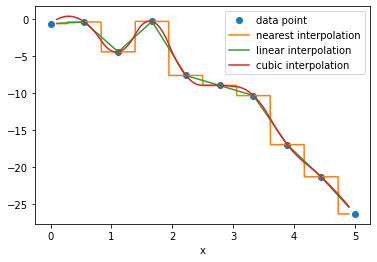

In [16]:
fig, ax = plt.subplots()

# plot the original data
ax.plot(x, y, 'o', label='data point')

# use finer and regular mesh for interpolated plots
xfine = numpy.linspace(0.1, 4.9, n * 100)

ax.plot(xfine, y0(xfine), label='nearest interpolation')
ax.plot(xfine, y1(xfine), label='linear interpolation')
ax.plot(xfine, y2(xfine), label='cubic interpolation')

ax.set_xlabel('x')
ax.legend();

__Summary:__

- Data interpolation of $y_i=f(x_i)$ may be useful to
  - create smoother plots of $f(x)$
  - find minima/maxima of $f(x)$
  - find inverse function $x=f^{-1}(y)$
  - integrate $f(x)$


- Need to decide how to interpolate (nearest, linear, quadratic or cubic splines, ...)

---

## 3. Jupyter notebook

- Another kind of integrated development environment (IDLE) for Python

    - may other IDLEs exist including Spyder, Eclipse, PyCharm (commercial), Emacs, vi/vim, Sublime Text (commercial), Kate


- Used to be the IPython Notebook, but now supports many more languages than Python, thus a new name was chosen.


- Jupyter Notebook creates an executable document that is hosted in a web browser.


- We recommend you try this at some point, it has great value for computational engineering and research.


- Read more at https://jupyter.org

---